In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.TotalCharges.dtype

dtype('float64')

In [8]:
df.isnull().sum().sort_values(ascending=False)

TotalCharges        11
customerID           0
DeviceProtection     0
MonthlyCharges       0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
OnlineBackup         0
gender               0
OnlineSecurity       0
InternetService      0
MultipleLines        0
PhoneService         0
tenure               0
Dependents           0
Partner              0
SeniorCitizen        0
Churn                0
dtype: int64

In [9]:
#filling missing values of the 'TotalCharges' column with 0
df['TotalCharges'].fillna(0, inplace=True)

In [10]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [11]:
#converting 'Churn' column to binary values
label = {'No': 0, 'Yes': 1}
df['Churn']= df['Churn'].map(label)

In [12]:
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract', 'PaperlessBilling', 'PaymentMethod']
numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']

X_cat = df[categorical].values
X_num = df[numerical].values
y = df['Churn'].values

X_cat_train, X_cat_test, y_train, y_test = train_test_split(X_cat, y, test_size=0.2, random_state=1)

X_num_train, X_num_test, y_train, Y_test = train_test_split(X_num, y, test_size=0.2, random_state=1)

#instantiate OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
X_cat_train = ohe.fit_transform(X_cat_train)
X_cat_test = ohe.transform(X_cat_test)

cat_names = ohe.get_feature_names_out(categorical)

#converting the transformed categories back to a DataFrame
X_cat_train = pd.DataFrame(X_cat_train, columns=cat_names)
X_cat_test = pd.DataFrame(X_cat_test, columns=cat_names)

#instantiate StandardScaler
scaler = StandardScaler()
X_num_train = scaler.fit_transform(X_num_train)
X_num_test = scaler.transform(X_num_test)

#converting the transformed numerical columns back to DataFrame
X_num_train = pd.DataFrame(X_num_train, columns=numerical)
X_num_test = pd.DataFrame(X_num_test, columns=numerical)

#combining scaled numerical and one hot encoded categorical data into train set dataframe
X_train = pd.concat([X_cat_train, X_num_train], axis = 1)

#combining scaled numerical and one hot encoded categorical data into test set dataframe
X_test = pd.concat([X_cat_test, X_num_test], axis = 1)


In [15]:
X_test

,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.355233,0.500655,0.460383
1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.373437,1.249767,1.850854
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.825884,-0.657063,-0.773570
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.110981,-0.471031,-0.894653
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.907340,0.037235,-0.713691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.296418,1.367698,0.166721
1405,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.703699,-1.500852,-0.858624
1406,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.577078,-0.359744,0.710978
1407,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.332709,0.696653,1.505167


In [19]:
#Question 14
rf= RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
print(accuracy_score(y_test, pred))

0.794180269694819


In [20]:
#Question 15
xgbc = xgb.XGBClassifier(random_state=1)
xgbc.fit(X_train, y_train)
pred= xgbc.predict(X_test)
print(accuracy_score(y_test, pred))

0.7934705464868701


In [22]:
#Question 16
lgbm = lgb.LGBMClassifier(random_state=1)
lgbm.fit(X_train, y_train)
pred = lgbm.predict(X_test)
print(accuracy_score(y_test, pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1521, number of negative: 4113
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 670
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.269968 -> initscore=-0.994785
[LightGBM] [Info] Start training from score -0.994785
0.8034066713981547


In [33]:
#Question 17
etc =  ExtraTreesClassifier()
params = {'n_estimators': [50, 100, 300, 500, 1000], 'min_samples_split': [2, 3, 5, 7, 9], 'min_samples_leaf': [1, 2, 4, 6, 8], 'max_features': ['auto', 'sqrt', 'log2', None]}
rcv = RandomizedSearchCV(etc, params, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, verbose=1, random_state=1)
rcv.fit(X_train, y_train)
print(rcv.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 50, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_features': 'log2'}


In [34]:
#Question 18
etc = ExtraTreesClassifier(n_estimators=50, min_samples_split=7, min_samples_leaf=6, max_features= 'log2', random_state=1)
etc.fit(X_train, y_train)
pred = etc.predict(X_test)
print(accuracy_score(y_test, pred))

0.8105039034776437


Question 18

It is Higher.

In [46]:
#Question 19
print((ExtraTreesClassifier().get_params()))

{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


Question 19

Both B and C

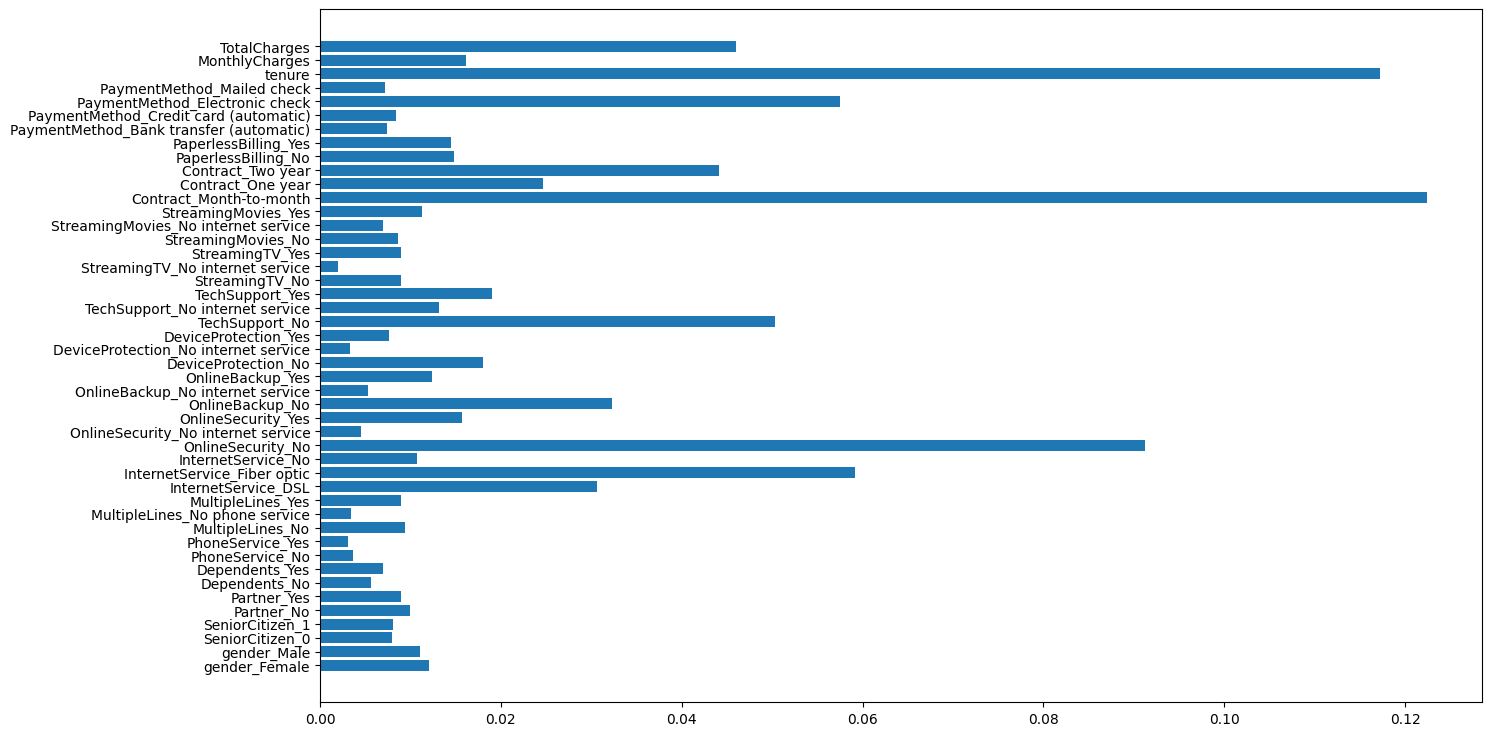

In [40]:
#Question 20
plt.figure(figsize=(15,9))
plt.barh(X_train.columns, etc.feature_importances_)
plt.show()

The two most important features using the optimal ExtraTreesClassifier model are:

Contract_month_to_month, Tenure.